# Plots do Coeficiente de Dissosiação
A visualização irá se basear na equação de Arrhenius
$$
k_{-1} = \nu \text{exp} \left( - \frac{E_{a}}{k{b} T}\right)
$$
em que:
- $k_{b}$ é a constante de Boltzman

Iremos usar a temperatura absoluta de uma célula dentro do corpo humano $T = 36°C$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Parâmetros fixos
T = 37 + 273.15  # Temperatura em Kelvin 
kB = 1.38e-23   # Constante de Boltzmann em J/K 

In [20]:
# --- Gráfico 1: k_-1 vs E_a ---
nu_fixed = 1e10 # Fator pré-exponencial fixo em s^-1
Ea_range = np.linspace(0.5e-20, 15e-20, 500) # Faixa de energia de ativação em Joules

k_minus_1_vs_Ea = nu_fixed * np.exp(-Ea_range / (kB * T))

In [21]:
# --- Gráfico 2: k_-1 vs nu ---
Ea_fixed = 5e-20 # Energia de ativação fixa em Joules
nu_range = np.logspace(8, 13, 500) # Faixa de fator pré-exponencial (logarítmica) em s^-1

# Calcula k_-1 para cada nu
k_minus_1_vs_nu = nu_range * np.exp(-Ea_fixed / (kB * T))

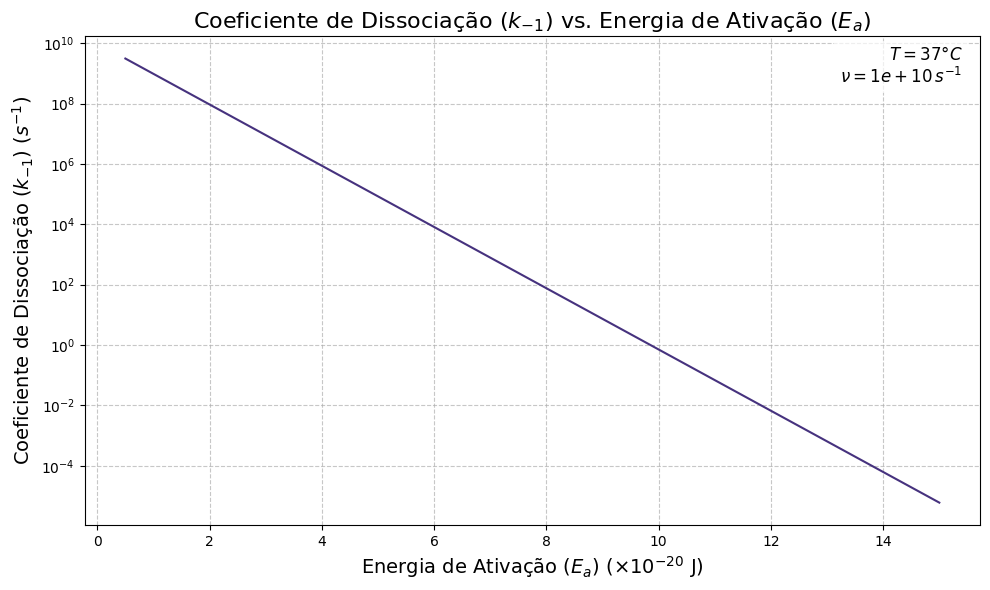

In [22]:
# Plot 1: k_-1 vs Ea
plt.figure(figsize=(10, 6))
plt.plot(Ea_range * 1e20, k_minus_1_vs_Ea, color=sns.color_palette("viridis")[0])
plt.title(r'Coeficiente de Dissociação ($k_{-1}$) vs. Energia de Ativação ($E_a$)', fontsize=16)
plt.xlabel(r'Energia de Ativação ($E_a$) ($\times 10^{-20}$ J)', fontsize=14)
plt.ylabel(r'Coeficiente de Dissociação ($k_{-1}$) ($s^{-1}$)', fontsize=14)
plt.yscale('log')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.text(0.98, 0.98, f'$T = {T-273.15:.0f}°C$\n$\\nu = {nu_fixed:.0e}\\,s^{{-1}}$',
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.tight_layout()
# plt.savefig('k_vs_Ea_plot.png')
plt.show()

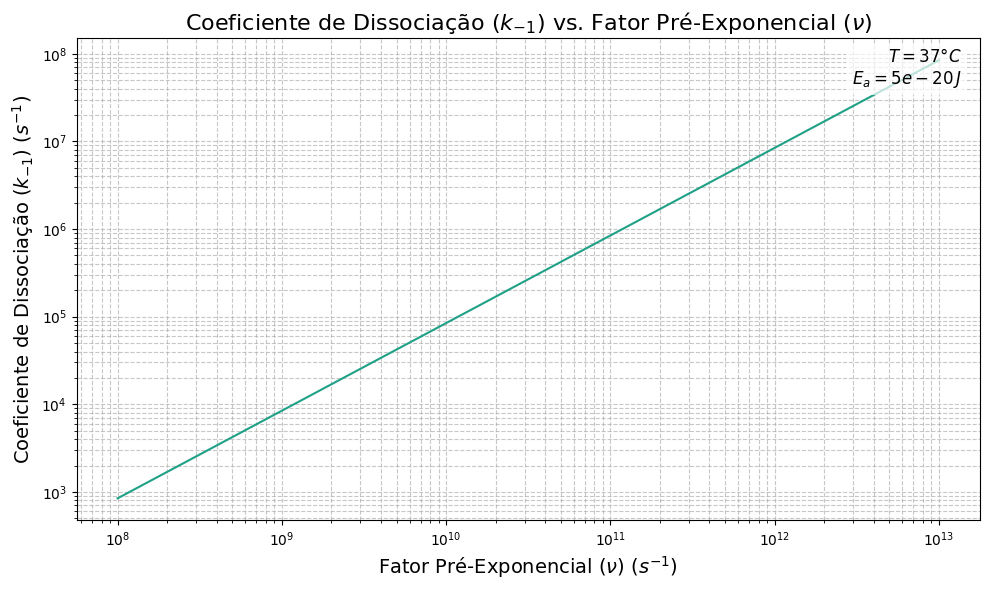

In [23]:
# Plot 2: k_-1 vs nu
plt.figure(figsize=(10, 6))
plt.plot(nu_range, k_minus_1_vs_nu, color=sns.color_palette("viridis")[3])
plt.title(r'Coeficiente de Dissociação ($k_{-1}$) vs. Fator Pré-Exponencial ($\nu$)', fontsize=16)
plt.xlabel(r'Fator Pré-Exponencial ($\nu$) ($s^{-1}$)', fontsize=14)
plt.ylabel(r'Coeficiente de Dissociação ($k_{-1}$) ($s^{-1}$)', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.text(0.98, 0.98, f'$T = {T-273.15:.0f}°C$\n$E_a = {Ea_fixed:.0e}\\,J$',
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.tight_layout()
# plt.savefig('k_vs_nu_plot.png')
plt.show()


## Probabilidade de Dissosiação
Para mostrar a probabilidade de dissosiação, utilizaremos a equação:
$$
p = 1 - \text{exp}(-k_{-1} t)
$$

In [24]:
# Parâmetros para a demonstração
k_dissociation_fast = 0.5  # Taxa rápida (e.g., s^-1)
k_dissociation_medium = 0.1 # Taxa média
k_dissociation_slow = 0.02 # Taxa lenta

# Pontos de tempo para o plot
time_points = np.linspace(0, 30, 500)

In [25]:
# Calcula a probabilidade de dissociação para cada constante de taxa
prob_dissociation_fast = 1 - np.exp(-k_dissociation_fast * time_points)
prob_dissociation_medium = 1 - np.exp(-k_dissociation_medium * time_points)
prob_dissociation_slow = 1 - np.exp(-k_dissociation_slow * time_points)

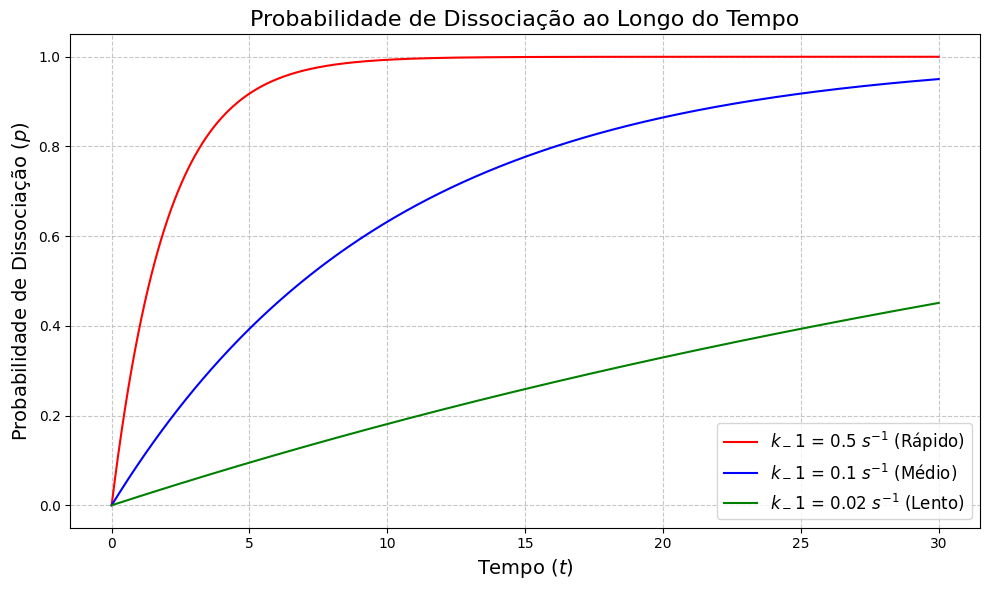

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, prob_dissociation_fast, label=f'$k_{-1}$ = {k_dissociation_fast} $s^{{-1}}$ (Rápido)', color='red')
plt.plot(time_points, prob_dissociation_medium, label=f'$k_{-1}$ = {k_dissociation_medium} $s^{{-1}}$ (Médio)', color='blue')
plt.plot(time_points, prob_dissociation_slow, label=f'$k_{-1}$ = {k_dissociation_slow} $s^{{-1}}$ (Lento)', color='green')

plt.title('Probabilidade de Dissociação ao Longo do Tempo', fontsize=16)
plt.xlabel('Tempo ($t$)', fontsize=14)
plt.ylabel('Probabilidade de Dissociação ($p$)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('prob_dissociation_plot.png')
plt.show()

---
## Dissociação e Associação na Presença de Forças (12.2.2 e 12.2.3)
Para modelar a associação de moléculas, utilizaremos o modelo de **Hooke** em que a ligação pode ser modelada como um sistema massa-mola
A constante de dissosiação é dada por
$$
K_{D} = K_{D}^{0} \exp \left[\frac{0.5 \kappa (x-x_{min})^2}{k_{B} T}\right]
$$
ou 
$$
K_{D} = K_{D}^{0} \exp \left[\frac{0.5  \frac{F^2}{\kappa}}{k_{B} T}\right]
$$

e a taxa de dissociação é dada por:
$$
k_{-1} = k_{-1}^{0} \exp \left[\frac{\kappa (x_{a} - x_{min})(x-x_{min})}{k_{B} T}\right]
$$

In [27]:
# Espaço de forças de teste em (pN)
forcas = np.linspace(0, 200e-12, 500)

# Parâmetros para o modelo
kappa_hooke = 100  # N/m
KD_0_hooke = 1.0e-9  # Constante de dissosiação não estressada

# Constante de dissosicação
KD_hooke = KD_0_hooke * np.exp((0.5 * (forcas**2 / kappa_hooke))/(kB * T))

In [28]:
k_minus_1_0_hooke = 0.5
xa_minus_X_min_hooke = 0.1e-9

k_minus_1_hooke = k_minus_1_0_hooke * np.exp((xa_minus_X_min_hooke * forcas) / (kB * T))

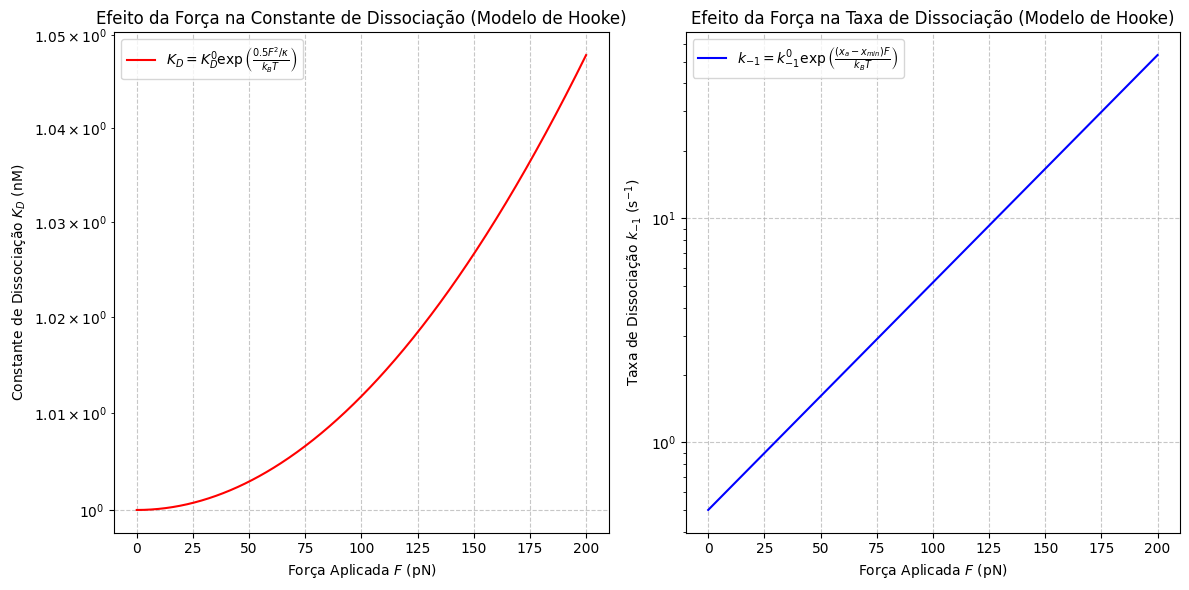

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot da Constante de Dissociação (KD)
# Convertendo KD para nM para melhor visualização
ax[0].plot(forcas * 1e12, KD_hooke * 1e9, label=r'$K_D = K_D^0 \exp\left(\frac{0.5 F^2/\kappa}{k_B T}\right)$', color='red')
ax[0].set_xlabel('Força Aplicada $F$ (pN)')
ax[0].set_ylabel(r'Constante de Dissociação $K_D$ (nM)')
ax[0].set_title('Efeito da Força na Constante de Dissociação (Modelo de Hooke)')
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].set_yscale('log')
ax[0].legend()
# ax[0].tight_layout()

# Plot da Taxa de Dissociação (k_minus_1)
ax[1].plot(forcas * 1e12, k_minus_1_hooke, label=r'$k_{-1} = k_{-1}^0 \exp\left(\frac{(x_a-x_{min})F}{k_B T}\right)$', color='blue')
ax[1].set_xlabel('Força Aplicada $F$ (pN)')
ax[1].set_ylabel(r'Taxa de Dissociação $k_{-1}$ (s$^{-1}$)')
ax[1].set_title('Efeito da Força na Taxa de Dissociação (Modelo de Hooke)')
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].set_yscale('log')
ax[1].legend()

plt.tight_layout()
plt.show()